<a href="https://colab.research.google.com/github/prashantpandya000/cifar_10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary library
import tensorflow as tf 
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# loading dataset from keras
(x_train,y_train), (x_test,y_test)=datasets.cifar10.load_data()

In [3]:
# reshaping dataset 
y_train=y_train.reshape(-1,)

In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
# creating list for dataset
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
#function to check if datasee loaded is correct or not 
def plot_Sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


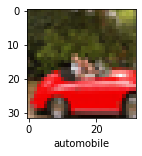

In [7]:
# calling the dataset to view image as well as name 
plot_Sample(x_train,y_train,99)

In [8]:
# dividing data by 255 as we want our data in between 0 t0 1 
x_train=x_train/255
y_train=y_train/255

In [9]:
#NETB

NetB=models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(300,activation='relu'),
                         layers.Dense(10,activation='sigmoid')
])

NetB.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
NetB.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 4.1435e-04 - accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7208e-04 - accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0693e-04 - accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6873e-04 - accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4329e-04 - accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2497e-04 - accuracy: 0.1000
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1109e-04 - accuracy: 0.1000
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0020e-04 - accuracy: 0.1000
Epoch 10/50
1563/1563 [===========================

In [21]:
#NETA

NetA=models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(10,activation='sigmoid')
])

NetA.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
NetA.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0029 - accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 4.9973e-04 - accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 3.4537e-04 - accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7207e-04 - accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2772e-04 - accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9759e-04 - accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7555e-04 - accuracy: 0.1000
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5861e-04 - accuracy: 0.1000
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4512e-04 - accuracy: 0.1000
Epoch 10/50
1563/1563 [===========================

In [22]:
# evaluating NetA model
NetA.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6017.0659 - accuracy: 0.1000


[6017.06591796875, 0.10000000149011612]

In [23]:
# evaluating NetB model
NetB.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6822.1343 - accuracy: 0.1000


[6822.13427734375, 0.10000000149011612]

In [ ]:
# report generation to see precision recall f1-score and support for NetA
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=NetA.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("classification report for NetA \n",classification_report(y_test,y_pred_classes))

In [ ]:
# report generation to see precision recall f1-score and support for NetB

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=NetB.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("classification report for NetB \n",classification_report(y_test,y_pred_classes))

In [15]:
#NETC

NetC=models.Sequential([
                        #cnn
                        layers.Conv2D(filters=32,kernel_size=(5,25),activation='relu',input_shape=(32,32,3)),
                        layers.MaxPooling2D((2,2)),   
                        #Dense
                        layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(10,activation='sigmoid')
])

NetC.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
NetC.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 0.0031 - accuracy: 0.0999
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1377e-06 - accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 4.1093e-07 - accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0976e-07 - accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 4.1632e-08 - accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1462e-08 - accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 4.9421e-09 - accuracy: 0.1000
Epoch 8/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.2315e-09 - accuracy: 0.1000
Epoch 9/50
1563/1563 [==============================] - 4s 2ms/step - loss: 9.0121e-10 - accuracy: 0.1000
Epoch 10/50
1563/1563 [===========================

In [16]:
# evaluating NetB model
NetC.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 23249.3906 - accuracy: 0.1000


[23249.390625, 0.10000000149011612]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=NetC.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("classification report for NetC \n",classification_report(y_test,y_pred_classes))

classification report for NetC 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
nets = [NetA(), NetB(), NetC(), NetD()]
histories = []
for net in nets:
  net_name = type(net).__name__
  print(f'==== Training {net_name} ====')
  train_history, test_history = train(net, train_loader, test_loader,num_epochs=NUM_EPOCHS,learning_rate=LEARNING_RATE,compute_accs=True)
  histories.append({
      'name': net_name,
      'net': net,
      'train_accs': train_history,
      'test_accs': test_history
      })
plot_history(histories)

ValueError: ignored